<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_5_machine_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 | Machine Learning Basics

References:
1. Wolpert, D. H., & Macready, W. G. (1997). No free lunch theorems for optimization. IEEE transactions on evolutionary computation, 1(1), 67-82.
2. Cortes, C. (1995). Support-Vector Networks. Machine Learning.
3. Hinton, Geoffrey E., Simon Osindero, and Yee-Whye Teh. "A fast learning algorithm for deep belief nets." Neural computation 18, no. 7 (2006): 1527-1554.
4. Li, B., Friedman, J., Olshen, R., & Stone, C. (1984). Classification and regression trees (CART). Biometrics, 40(3), 358-361.
5. Köppen, M. (2000, September). The curse of dimensionality. In 5th online world conference on soft computing in industrial applications (WSC5) (Vol. 1, pp. 4-8).
6. Cayton, L. (2008). Algorithms for manifold learning (p. 1). eScholarship, University of California.
7. Balasubramanian, M., & Schwartz, E. L. (2002). The isomap algorithm and topological stability. Science, 295(5552), 7-7.

# Learning Algorithms

- Classification
- Classification with missing inputs
- Regression
- Transcription
- Machine translation
- Structured output
- Anomaly detection
- Synthesis and sampling
- Imputation of missing values
- Denoising
- Density estimation or probability mass function estimation

# Supervised and Unsupervised Learning

**Unsupervised learning algorithms** experience a dataset containing many features, then learn useful properties of the structure of this dataset. In the context of deep learning, we usually want to learn the entire probability distribution that generated a dataset, whether explicitly, as in density estimation, or implicitly for tasks such as synthesis or denosing.

**Supervised learning algorithms** experience a dataset containing features, but each example is also associated with a label or target. For example, the Iris dataset is annotated with species of each iris plant.

# Linear Regression

Linear regression solves the regression problem. In other words, the goal is to build a system that can take a vector $x \in \mathbb{R}^n$ as input and predict the value of a scalar $y \in \mathbb{R}$ The output of linear regression is a linear function of the input. Let $\hat{y}$ be the value that our model predicts y should take on. We define the output to be

$$
  \hat{y} = w^Tx
$$

where $w \in \mathbb{R}$ is a vector of parameters

## Mean Squared Error

We need a performance measure to evaluate the model.

$$
  MSE_{test} = \frac{1}{m} \sum_i (\hat{y}^{(test)} - y^{(test)})^2_i \\
$$

Intiutively, one can see the error measure decreases to $0$ when $\hat{y}^{(test)} = y^{(test)}$

We can also see that:

$$
  MSE_{test} = \frac{1}{m} || \hat{y}^{(test)} - y^{(test)} ||^2_2
$$

so the error increases whenevery the Euclidean distance between the predictions and the targets increase.

To minimize $MSE_{train}$ we can simply solve for where its gradient is 0:

$$
  \nabla_w MSE_{train} = 0 \\
  \nabla_w \frac{1}{m} || \hat{y}^{(train)} - y^{(train)} ||^2_2 = 0 \\
  \frac{1}{m} \nabla_w || X^{(train)}w - y^{(train)}||^2_2 = 0  \\
  \nabla_w (X^{(train)}w - y^{(train)})^T(X^{(train)}w - y^{(train)}) = 0 \\
  \nabla_w (w^T X^{(train)T} X^{(train)}w - 2w^TX^{(train)T}y^{(train)} + y^{(train)T}y^{(train)}) = 0  \\
  2 X^{(train)T}X^{(train)}w - 2X^{(train)T}y^{(train)} = 0 \\
  w = (X^{(train)T}X^{(train)})^{-1} X^{(train)T}y^{(train)}
$$

The system of equations whose solutions are given on the final line are known as the **normal equations**.

It is worth noting that the term **linear regression** is often used to refer to a slightly more sophisticated model with one additional parameter - an intercept term b

$$
  \hat{y} = w^Tx + b
$$

So mapping from parameters to predictions is still a linear function but the mapping from features to predictions is now an affine function. This extension to affine functions means the plot of the model's predictions still looks like a line, but it need not pass through the origin.

The intercept term $b$ is often called the bias parameter of the affine transformation. The terminology derives from the point of view that the output of the transformation is biased towards being $b$ in the absence of any input.


Final parameters: w = 1.9540, b = 1.0215


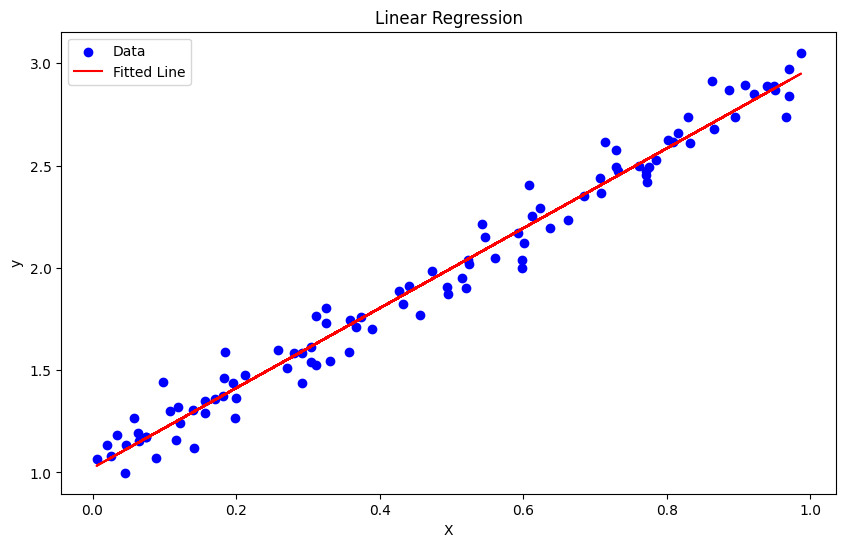

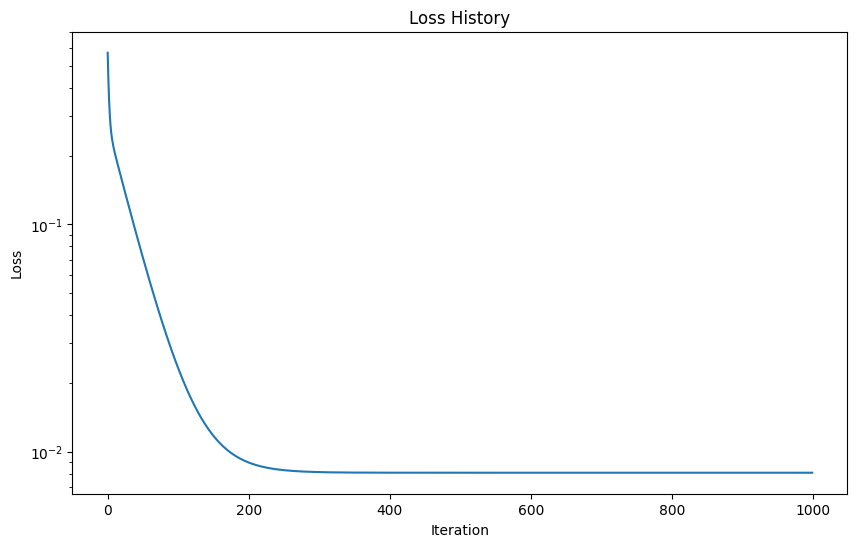

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Lists to store the loss history
loss_history = []

# Gradient descent
for i in range(num_iterations):
    # Forward pass
    y_pred = np.dot(X, w) + b

    # Compute loss
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)

    # Compute gradients
    dw = (2/len(y)) * np.dot(X.T, (y - y_pred))
    db = (2/len(y)) * np.sum(y - y_pred)

    # Update parameters
    w += learning_rate * dw
    b += learning_rate * db

# Print final parameters
print(f"Final parameters: w = {w[0][0]:.4f}, b = {b[0]:.4f}")

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.dot(X, w) + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.yscale('log')
plt.show()

# Capacity, Overfitting and Underfitting

The central challenge in machine learning is that our algorithm must perform well on new, previously unseen inputs - not just those on which our model was trained. The ability to perform well on previously unobserved inputs is called generalization.

What seperates machine learning from optomization is that we want the **generalization error** also called the **test error**, to be low was well. The generalization error is defined as the expected value of the error on a new input.

In our linear regression example, we trained the model

$$
\frac{1}{m^{(train)}} || X ^{(train)}w - y^{(train)} ||^2_2
$$

But we actually care about the test error

$$
  \frac{1}{m^{(test)}} || X^{(test)}w - y^{(test)} ||^2_2
$$

**Underfitting** occurs when the model is not able to obtain a sufficiently low error value on the training set.

**Overfitting** occurs when the gap between training error and test error is too large.

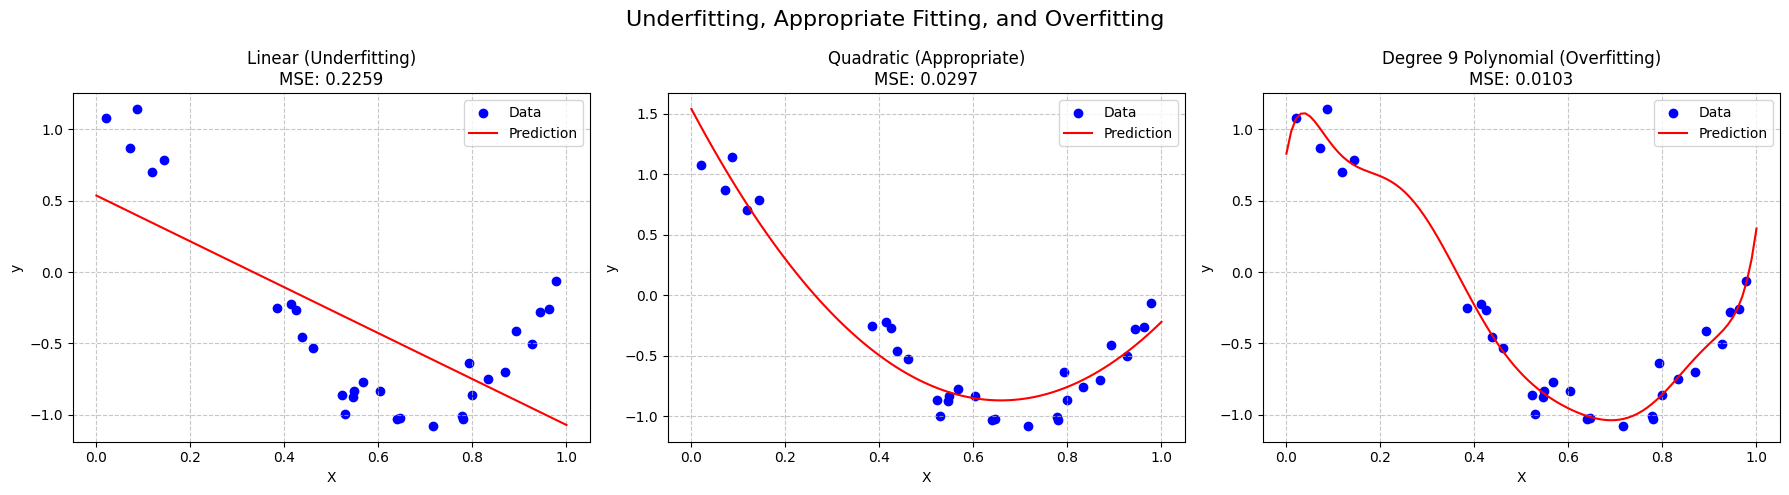

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.uniform(0, 1, 30))
y = np.cos(1.5 * np.pi * X) + np.random.normal(0, 0.1, 30)

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Create models
models = [
    ("Linear (Underfitting)", LinearRegression()),
    ("Quadratic (Appropriate)", LinearRegression()),
    ("Degree 9 Polynomial (Overfitting)", LinearRegression())
]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Underfitting, Appropriate Fitting, and Overfitting", fontsize=16)

# Colors for actual data and predictions
data_color = 'blue'
pred_color = 'red'

for i, (title, model) in enumerate(models):
    ax = axs[i]

    # Prepare features
    if i == 0:  # Linear
        X_poly = X
    elif i == 1:  # Quadratic
        X_poly = PolynomialFeatures(degree=2).fit_transform(X)
    else:  # Degree 9 Polynomial
        X_poly = PolynomialFeatures(degree=9).fit_transform(X)

    # Fit the model
    model.fit(X_poly, y)

    # Make predictions
    X_test = np.linspace(0, 1, 100).reshape(-1, 1)
    if i == 0:
        X_test_poly = X_test
    elif i == 1:
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
    else:
        X_test_poly = PolynomialFeatures(degree=9).fit_transform(X_test)

    y_pred = model.predict(X_test_poly)

    # Calculate MSE
    mse = mean_squared_error(y, model.predict(X_poly))

    # Plot
    ax.scatter(X, y, color=data_color, label='Data')
    ax.plot(X_test, y_pred, color=pred_color, label='Prediction')
    ax.set_title(f"{title}\nMSE: {mse:.4f}")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# K-Nearest Neighbour

K-nearest neigbour is a non-parametric model, whose complexity is a function of the training size. Unlike linear regression the nearest neighbour model simply stores $X$ and $y$ from the training set. When asked to classify a point $x$, the model looks up the nearest entry in the training set and returns the associated regression target.

In other words $\hat{y} = y_i$ where $i = arg min ||X_i -x ||^2_2$

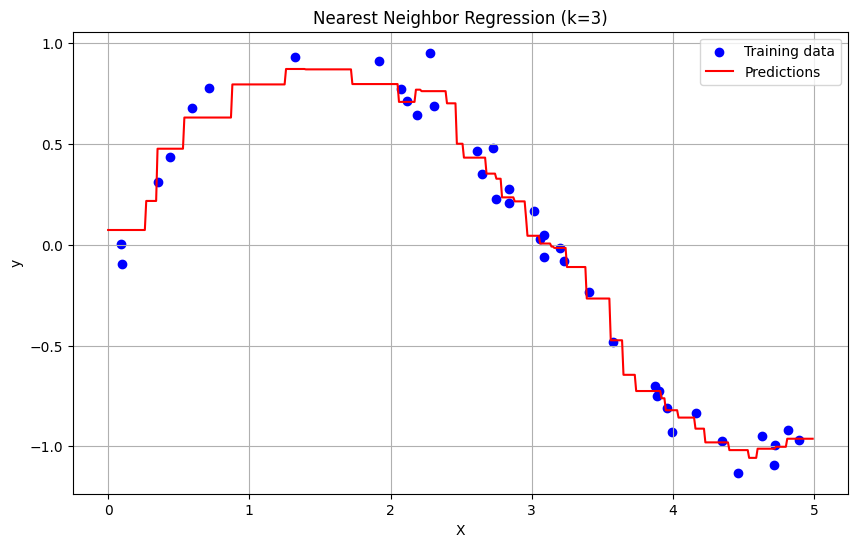

Sample predictions:
X: 0.00, Predicted y: 0.07
X: 1.00, Predicted y: 0.80
X: 2.00, Predicted y: 0.80
X: 3.00, Predicted y: 0.04
X: 4.00, Predicted y: -0.82


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NearestNeighborRegressor:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_neighbor_ids = distances.argsort()[:self.k]
            nearest_neighbor_values = self.y_train[nearest_neighbor_ids]
            prediction = np.mean(nearest_neighbor_values)
            predictions.append(prediction)
        return np.array(predictions)

# Generate sample data
np.random.seed(0)
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.1, X_train.shape[0])

# Create and train the model
model = NearestNeighborRegressor(k=3)
model.fit(X_train, y_train)

# Generate points for prediction
X_test = np.arange(0, 5, 0.01).reshape(-1, 1)

# Make predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.title('Nearest Neighbor Regression (k=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print some sample predictions
print("Sample predictions:")
for i in range(0, len(X_test), 100):
    print(f"X: {X_test[i][0]:.2f}, Predicted y: {y_pred[i]:.2f}")

# Bayes Error

The ideal model is an oracle that simply knows the true probability distribution that generates the data. Even such a model will still incur some error on many problems, because there may still be noise in the distribution.

The error incurred by an oracle making predictions from the true distribution $p(x,y)$ is called **Bayes error**

# The No Free Lunch Theorem

The **no free lunch theorem** for machine learning (Wolpert 1997) states that, averaged over all possible data-generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points. In other words in some sense, no machine learning algorithm is universally any better than any other. Themost sophisticated algorithm we can concieve of has the same average performance (over all possible tasks) as merely predicting that every point belongs to the same class.

# Regularization

**Regularization** is any modiciation we make to a learning algorithm that is not intended to reduce its generalization error but not its training error.


We modify the training criterion of linear regression to include **weight decay**. TO perform linear regression with weight decay, we mimimize a sum $J(w)$ comprising of both the mean squared error on the training and a criterion that expresses the perference for the weights to have smaller $L^2$ norm. Specifically

$$
  J(w) = MSE_{train} + \lambda w^T w
$$

where $\lambda$ is a value chosen ahead of time that controls the strength of our preference for smaller weights. When $\lambda = 0$, we impose no preference, and larger $\lambda$ forces the weights to become smaller.

Polynomial Regression (degree 10):

Lambda too large (λ=10):
Train MSE: 0.4791, Test MSE: 0.3602

Appropriate Lambda (λ=0.01):
Train MSE: 0.0920, Test MSE: 1.5206

No regularization (λ=0):
Train MSE: 0.1032, Test MSE: 8.6789


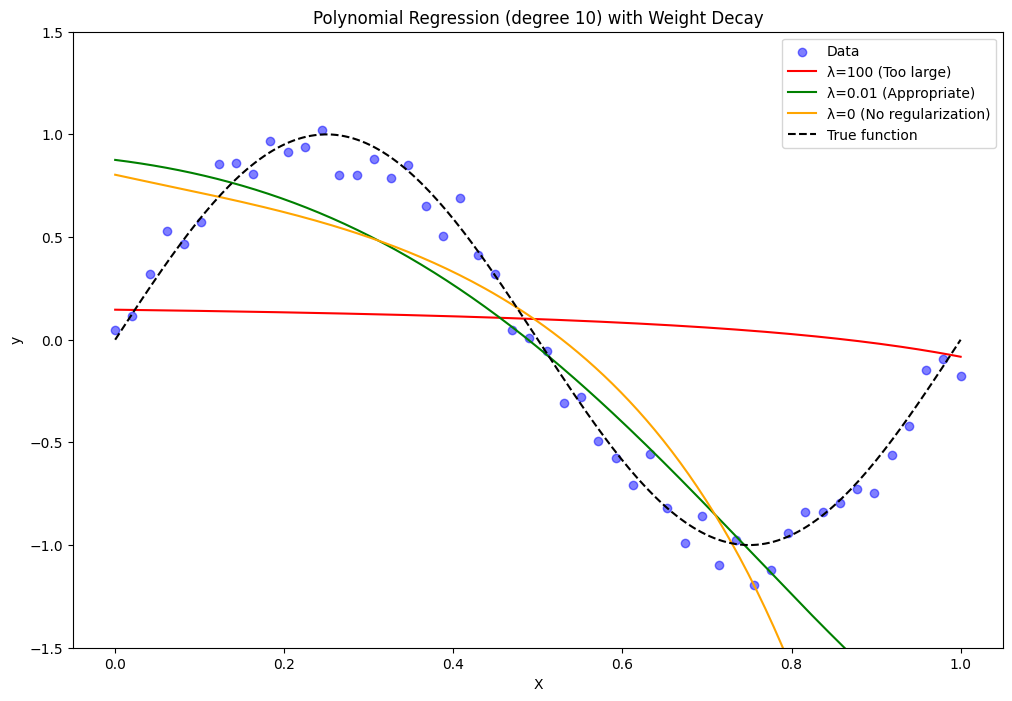

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 50).reshape(-1, 1)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, X.shape)

# Split data into train and test sets
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(1, degree+1)])

def polynomial_regression_weight_decay(X, y, degree, lambda_val, learning_rate=0.01, epochs=5000):
    X_poly = polynomial_features(X, degree)
    w = np.random.randn(X_poly.shape[1], 1)
    b = np.random.randn(1)

    for _ in range(epochs):
        y_pred = X_poly.dot(w) + b
        dw = (1/len(y)) * (X_poly.T.dot(y_pred - y) + lambda_val * w)
        db = (1/len(y)) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

def evaluate_model(X, y, w, b, degree):
    X_poly = polynomial_features(X, degree)
    y_pred = X_poly.dot(w) + b
    mse = np.mean((y - y_pred)**2)
    return mse

degree = 10  # Polynomial degree

# Example 1: Lambda too large
w_large, b_large = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=100)
mse_large_train = evaluate_model(X_train, y_train, w_large, b_large, degree)
mse_large_test = evaluate_model(X_test, y_test, w_large, b_large, degree)

# Example 2: Appropriate Lambda
w_appropriate, b_appropriate = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=0.01)
mse_appropriate_train = evaluate_model(X_train, y_train, w_appropriate, b_appropriate, degree)
mse_appropriate_test = evaluate_model(X_test, y_test, w_appropriate, b_appropriate, degree)

# Example 3: Lambda = 0 (No regularization)
w_zero, b_zero = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=0)
mse_zero_train = evaluate_model(X_train, y_train, w_zero, b_zero, degree)
mse_zero_test = evaluate_model(X_test, y_test, w_zero, b_zero, degree)

# Print results
print(f"Polynomial Regression (degree {degree}):")
print("\nLambda too large (λ=10):")
print(f"Train MSE: {mse_large_train:.4f}, Test MSE: {mse_large_test:.4f}")

print("\nAppropriate Lambda (λ=0.01):")
print(f"Train MSE: {mse_appropriate_train:.4f}, Test MSE: {mse_appropriate_test:.4f}")

print("\nNo regularization (λ=0):")
print(f"Train MSE: {mse_zero_train:.4f}, Test MSE: {mse_zero_test:.4f}")

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')

X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
X_plot_poly = polynomial_features(X_plot, degree)

plt.plot(X_plot, X_plot_poly.dot(w_large) + b_large, color='red', label='λ=100 (Too large)')
plt.plot(X_plot, X_plot_poly.dot(w_appropriate) + b_appropriate, color='green', label='λ=0.01 (Appropriate)')
plt.plot(X_plot, X_plot_poly.dot(w_zero) + b_zero, color='orange', label='λ=0 (No regularization)')
plt.plot(X_plot, np.sin(2 * np.pi * X_plot), color='black', linestyle='--', label='True function')

plt.legend()
plt.title(f'Polynomial Regression (degree {degree}) with Weight Decay')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.show()

# Hyperparameters and Validation Sets

Most machine learning algorithms have **hyperparameters**, settings that we can use to control the algorithms behaviour. The values of hyperparameters are not adpated by the learning algorithm itself (though we can desgin a nested learning procedure in which one learning algorithm learns the best hyperparameters for another learning algorithm).

The polynomial regresion example has a single hyperparmater: the degree of the polynomial, which acts as **capacity** hyperparameter. The $\lambda$ value used to control the strength of the weight decay is another example of a hyperparameter.

A **validation set** is a collection of training samples that te algorithm does not observe.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] - 2 * X[:, 4] + np.random.normal(0, 0.1, 1000)

# Step 1: Split the data into temporary train and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temporary train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Data split sizes:")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 3: Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"\nValidation MSE: {val_mse:.4f}")

# Step 6: Fine-tune hyperparameters (if necessary)
# For LinearRegression, there are no hyperparameters to tune.
# For other models, you would use the validation set to select the best hyperparameters.

# Step 7: Evaluate on test set
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")

# Optional: Print model coefficients
print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Data split sizes:
Train set: 600 samples
Validation set: 200 samples
Test set: 200 samples

Validation MSE: 0.0102
Test MSE: 0.0112

Model Coefficients:
Feature 1: 0.6001
Feature 2: 0.8877
Feature 3: -0.2832
Feature 4: 0.1401
Feature 5: -0.5800
Intercept: 1.2291


# Cross Validation

**Cross validation** involves repeating the training and testing computation on different randomly chosen subsets or splits of the original dataset. The most common of these is the **k-fold cross-validation**, in which a partition of the dataset is fromed by spliiting it into $k$ nonoverlapping subsets. The test error may then be estimated by taking the average test error across $k$ trials.

In [ ]:
import numpy as np

def generate_sample_data(n_samples=1000, n_features=5):
    """Generate sample data for demonstration."""
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.array([1.5, -0.8, 2.0, -1.2, 0.5])
    y = X.dot(true_coefficients) + np.random.randn(n_samples) * 0.5
    return X, y

def split_k_fold(X, y, k):
    """Split the data into k folds."""
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < k - 1 else len(X)

        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        yield X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def linear_regression_fit(X, y):
    """Fit linear regression using normal equation."""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def mean_squared_error(y_true, y_pred):
    """Calculate mean squared error."""
    return np.mean((y_true - y_pred)**2)

def k_fold_cross_validation(X, y, k=5):
    """Perform k-fold cross-validation."""
    mse_scores = []

    for i, (X_train, X_test, y_train, y_test) in enumerate(split_k_fold(X, y, k)):
        # Add a column of ones for the intercept term
        X_train_with_intercept = np.column_stack([np.ones(len(X_train)), X_train])
        X_test_with_intercept = np.column_stack([np.ones(len(X_test)), X_test])

        # Fit the model
        coefficients = linear_regression_fit(X_train_with_intercept, y_train)

        # Make predictions
        y_pred = X_test_with_intercept.dot(coefficients)

        # Calculate MSE for this fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"Fold {i+1} MSE: {mse:.4f}")

    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    print(f"Standard Deviation of MSE: {np.std(mse_scores):.4f}")

    return np.mean(mse_scores), np.std(mse_scores)

# Generate sample data
X, y = generate_sample_data()

# Perform k-fold cross-validation
k_fold_cross_validation(X, y, k=5)

Fold 1 MSE: 0.2564
Fold 2 MSE: 0.2433
Fold 3 MSE: 0.2837
Fold 4 MSE: 0.2503
Fold 5 MSE: 0.2445

Average MSE: 0.2557
Standard Deviation of MSE: 0.0148


(0.25565799361224995, 0.014779258228982175)

# Esimators, Bias and Variance

## Point estimation

**Point estimiation** is the attempt to provide a single best prediction of some quantity of intereest. In general the quantity of interest can be a single parameters, or a vector of parameters in some parametric model, such as the weights in our linear regression example, but it can also be a whole function.

## Bias

The bias of an estimator is defined as:

$$
  bias(\hat{\theta}_m) = \mathbb{E}(\hat{\theta}m) - \theta
$$

An esimtator $\hat{\theta}_m$ is siad to be **unbiased** if $bias(\hat{\theta}_m) =0$ which impled that $\mathbb{E}(\hat{\theta}_m) = 0$. An estimator $\hat{\theta}_m$ is said to **asymptotically unbiased if $\lim_{m\to \infty} bias(\hat{\theta}_m) - 0$, which implies that $\lim_{m \to \infty}\mathbb{E}(\hat{\theta}_m) = 0 $

A common estiamtor for the $\theta$ parameter is the this distribution is the mean of the training samples:

$$
  \hat{\theta}_m = \frac{1}{m}\sum_{i=1}^m x^{(i)}
$$

To determine wehther this estimator is biased, we can substitue this bias estimator into the following equation.

$$
  bias(\hat{\theta}_m) = \mathbb{E}[\hat{\theta}_m] - \theta  \\
  = \mathbb{E}[\frac{1}{m}\sum_{i=1}^m x^{(i)}] - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} \mathbb{E}[x^{(i)}] - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} \sum_{x^{(i)}=0}^1 (x^{(i)}\theta^{x^{(i)}} (1 - \theta)^{(1 - x^{(i)})}) - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} (\theta) - \theta  \\
  = \theta - \theta = 0
$$

Since $bias(\hat{\theta}) = 0$ we can say that out estimator $\hat{\theta}$ in unbiased.

True Mean: 5
Bias of Sample Mean Estimator: -0.111423

True Variance: 4
Bias of Biased Sample Variance Estimator: 0.477931
Bias of Unbiased Sample Variance Estimator: 0.523162


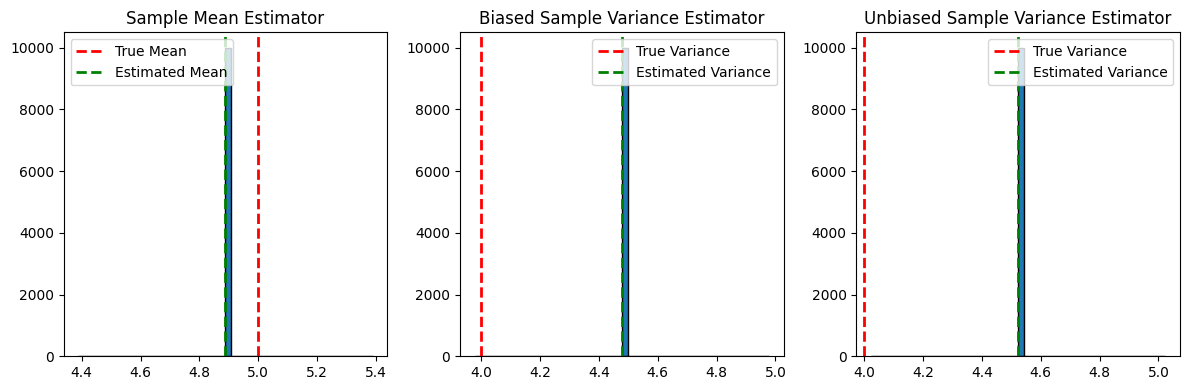

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_data(n_samples, true_mean, true_std):
    """Generate sample data from a normal distribution."""
    return np.random.normal(true_mean, true_std, n_samples)

def sample_mean_estimator(data):
    """Estimate the mean of the data."""
    return np.mean(data)

def sample_variance_estimator(data):
    """Estimate the variance of the data (biased estimator)."""
    return np.mean((data - np.mean(data))**2)

def unbiased_variance_estimator(data):
    """Estimate the variance of the data (unbiased estimator)."""
    return np.var(data, ddof=1)

def evaluate_bias(true_value, estimator_func, data, n_simulations):
    """Evaluate the bias of an estimator."""
    estimates = np.array([estimator_func(data) for _ in range(n_simulations)])
    bias = np.mean(estimates) - true_value
    return bias, estimates

# Set true parameters and simulation settings
true_mean = 5
true_variance = 4
true_std = np.sqrt(true_variance)
n_samples = 100
n_simulations = 10000

# Generate data
data = generate_sample_data(n_samples, true_mean, true_std)

# Evaluate bias for mean estimator
mean_bias, mean_estimates = evaluate_bias(true_mean, sample_mean_estimator, data, n_simulations)

# Evaluate bias for biased variance estimator
biased_var_bias, biased_var_estimates = evaluate_bias(true_variance, sample_variance_estimator, data, n_simulations)

# Evaluate bias for unbiased variance estimator
unbiased_var_bias, unbiased_var_estimates = evaluate_bias(true_variance, unbiased_variance_estimator, data, n_simulations)

# Print results
print(f"True Mean: {true_mean}")
print(f"Bias of Sample Mean Estimator: {mean_bias:.6f}")

print(f"\nTrue Variance: {true_variance}")
print(f"Bias of Biased Sample Variance Estimator: {biased_var_bias:.6f}")
print(f"Bias of Unbiased Sample Variance Estimator: {unbiased_var_bias:.6f}")

# Plotting
plt.figure(figsize=(12, 4))

# Mean estimator plot
plt.subplot(1, 3, 1)
plt.hist(mean_estimates, bins=50, edgecolor='black')
plt.axvline(true_mean, color='r', linestyle='dashed', linewidth=2, label='True Mean')
plt.axvline(np.mean(mean_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Mean')
plt.title('Sample Mean Estimator')
plt.legend()

# Biased variance estimator plot
plt.subplot(1, 3, 2)
plt.hist(biased_var_estimates, bins=50, edgecolor='black')
plt.axvline(true_variance, color='r', linestyle='dashed', linewidth=2, label='True Variance')
plt.axvline(np.mean(biased_var_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Variance')
plt.title('Biased Sample Variance Estimator')
plt.legend()

# Unbiased variance estimator plot
plt.subplot(1, 3, 3)
plt.hist(unbiased_var_estimates, bins=50, edgecolor='black')
plt.axvline(true_variance, color='r', linestyle='dashed', linewidth=2, label='True Variance')
plt.axvline(np.mean(unbiased_var_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Variance')
plt.title('Unbiased Sample Variance Estimator')
plt.legend()

plt.tight_layout()
plt.show()

# Variance and Standard Error

**Variance** is another property of an estimator that we maight want to consider, which is how much we exepct it to vary as a function of the data sample.

The **variance** of an estimator is simply the variance:

$$
  Var(\hat{\theta})
$$

The square root of the variance is called the **standard error** $SE(\hat{\theta})$

The variance, or standard error, of an estimator proivides a measure of how we would expect the estimate we compute from data to vary as we independently resample the datasert from underlying data-generating process.

The standard error of the mean is given by

$$
  SE(\hat{\mu}) = \sqrt{Var[\frac{1}{m}} \sum_{i=1}^m x^{(i)}] = \frac{\sigma}{\sqrt{m}}
$$
where $\sigma^2$ is the true variance of the samples $x^i$.

## Example

We once again consider a set of samples drawn independently and identically from a Bernoulli distributio. This time we are interested in computing the varaince of thee etimator $\hat{\theta}_m = \frac{1}{m} \sum_{i+1}^m x^{(i)}$


$$
  Var(\hat{\theta}_m) = Var (\frac{1}{m} \sum_{i+1}^m x^{(i)}) \\
  = \frac{1}{m^2} \sum_{i+1}^m Var(x^{(i)}) \\
  = \frac{1}{m^2} \sum_{i+1}^m \theta(1 - \theta) \\
  = \frac{1}{m^2} m\theta(1 - \theta) \\
  = \frac{1}{m} \theta(1 - \theta)
$$

The variance of the estimator decreases as a function of $m$, the number of examples in the dataset. This is a cmmon property of popular estimators, related to consistency.

# Mean Squares Error

The **mean squared error** (MSE) measures the overall expected deviation - in a squared error sense - between the estimator and the true value of the parameters $\theta$. Evaluating the MSE incorporates both the bias  and the variance.

$$
  MSE = \mathbb{E}[(\hat{\theta}_m - \theta)^2] \\
  = Bias(\hat{\theta}_m)^2 + Var(\hat{\theta}_m)
$$

Desirable estimators are those with small MSE and these are estimators that manage to keep both their bias and variance somewhat in check. Increasing capaity tends to increase variance and decrease bias.

# Consistency

As the number of data points in $m$ in our dataset increases, our point estimates coverge to the true value of the corresponding parameters. This condition described below is referred to as **consistency**.


$$
  plim_{m \to \infty} \hat{\theta}_m = \theta
$$

Consistency ensures that the bias induced by the estimator diminishes as the number of data examples grow.

# Maximum Likelihhood Estimation

The maxmimum likelihood extimator for $\theta$ is defines as

$$
  \theta_{ML} = arg \texttt{ } max_{\theta} p_{model} (\mathbb{X}; \theta) \\
  = arg \texttt{ } max_{\theta} \prod_{i=1}^{m} p_{model} (x^{(i)}; \theta)
$$

The product over many probabilites can be inconvnenient for various reasons. For example, it is prone to numerical overflow. To obtain a more conveniant but equivalent optimization probel, we obsever that taking the logarithm of the likelhihood does not change its arg max but does conveniantly transfrom a product into a sum:

$$
  \theta_{ML} = arg \texttt{ } max_{\theta}\sum_{i=1}^m log p_{model} (x^{(i)}; \theta) \\
  \theta_{ML} = arg \texttt{ } max_{\theta} \mathbb{E}_{x \sim \hat{p}_{data}} log p_{model} (x^{(i)}; \theta) \\
$$

One way to interpret the maximum likelihood is to view it as minimizung the dissamimlarity between the empiercal distribution $\hat{p}_{data}$, defined by the training set and the model distribution $p_{model}$, with the degree of dissimiarlity between  the two measured by the KL divergence:

$$
  D_{KL} (p_{model} || \hat{p}_{data}) = \mathbb{E}_{x \sim \hat{p}_{data}} \log \hat{p}_{data}(x) - \log p_{model} (x)
$$

Ther term on the left is constant, and a function only of the data-gernating process, not the model. THat means we train the model to minimize the KL divergenece by minimizing the term on the right.

$$
  - \mathbb{E}[\log p_{model} (x)]
$$

Minimizing the KL divergence corresponds exactly to minimizing the cross-entropy between the distributions.

For example the mean squared error is the cross-entropy between the empiercal distribution and a Gaussian model. Whole the opptimal $\theta$ is the same

Whether we are maximizing the likelihood or minimizing the KL dviergence, the values of the objective functions are different.

In fotware, we often phrase both as minimizing a cost function. Maxmium likelihood thus becomes minimization of the **negative log-likelihood** (NLL).

In [ ]:
import numpy as np
from scipy.optimize import minimize

def negative_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(np.log(1/(sigma * np.sqrt(2*np.pi))) - ((data - mu)**2)/(2*sigma**2))

# Generate sample data
np.random.seed(42)
true_mu, true_sigma = 5, 2
data = np.random.normal(true_mu, true_sigma, 1000)

# Perform MLE
result = minimize(negative_log_likelihood, x0=[0, 1], args=(data,), method='Nelder-Mead')
estimated_mu, estimated_sigma = result.x

print(f"True: mu={true_mu}, sigma={true_sigma}")
print(f"MLE: mu={estimated_mu:.2f}, sigma={estimated_sigma:.2f}")

True: mu=5, sigma=2
MLE: mu=5.04, sigma=1.96


# Conditional Log-likelihood

The maximum likelihood estimator can readily be generalized to estimate a condiational probbaility $P(y|x;\theta)$, in order to predict $y$ given $x$.

This is actually the most common situation because it forms the basis for most supvervised learning.

The condtional maximal likelihood estimator is

$$
  \theta_{ML} = arg \texttt{ } max P(Y|X;\theta)
$$

If the examples are assumed to be identical and independently distibuted (i.i.d.) then it becomes

$$
  \theta_{ML} = arg \texttt{ } max \sum_{i=1}^m \log P(y^{(i)}|x^{(i)};\theta)
$$

# Example: Linear Regression as Maxmium Likelihodd

The conditional log likelihood is given by

$$
  \sum_{i=1}^m \log p(y^{(i)} | x^{(i)}; \theta)
  = -m \log \sigma - \frac{m}{2} \log (2 \pi) - \sum_{i=1}^{m} \frac{||\hat{y}^{(i)} - y^{(i)}||^2}{2\sigma^2}
$$

Comparing log-likelihood  with mean square error

$$
  MSE_{train} = \frac{1}{m} \sum_{i=1}^m ||\hat{y}^{(i)} - y^{(i)}||^2
$$

## Consistency and Efficiency

No consistent estimator has a lower MSE thatn the maximum likelihood estimator.

**Consistency** - performance improves, the estimator $p_{model}$ converges to the true value of $p_{data}$

**Efficiency** - quick convergence in training.

The maximum likelihood estimator is known for its consistency and efficiency.

# Bayesian Statistics

So far we have discussed **frequentist statistics** and proahces based on estimating a single vlaue of $\theta$. Another approach is to consider all possible values of $\theta$ when making prediction. The latter is the domain of Bayesian statistics.

For real-valued parameters it is common to use a Gaussian as a prior distribution.

The more important difference is that Bayesian estimate provides a covariance matrix, showing how likely all the different values of $w$ are, rather than providing only the estimate $\mu_m$.

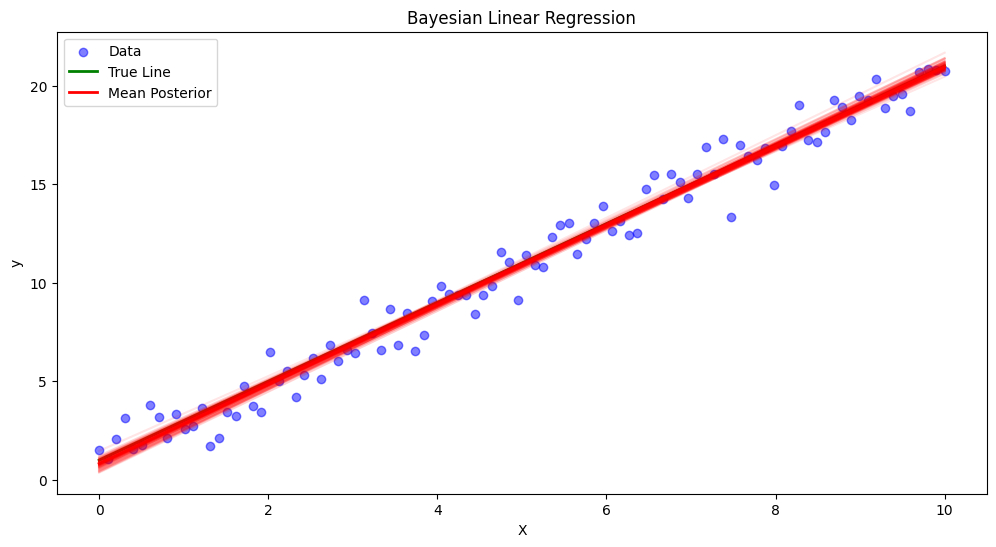

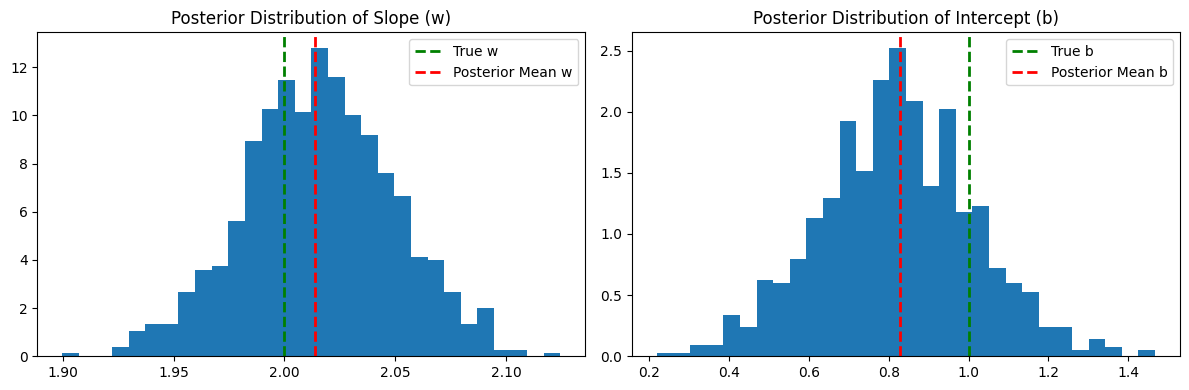

True parameters: w = 2, b = 1
Posterior mean: w = 2.01, b = 0.83
Posterior std: w = 0.03, b = 0.20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
true_w = 2
true_b = 1
y = true_w * X + true_b + np.random.normal(0, 1, X.shape)

# Define prior distributions
w_prior_mu = 0
w_prior_sigma = 10
b_prior_mu = 0
b_prior_sigma = 10

# Compute posterior distributions
def compute_posterior(X, y, w_prior_mu, w_prior_sigma, b_prior_mu, b_prior_sigma):
    n = len(X)
    X_with_intercept = np.column_stack([np.ones(n), X])

    # Compute the precision matrix (inverse of covariance matrix)
    Lambda_prior = np.diag([1/b_prior_sigma**2, 1/w_prior_sigma**2])
    Lambda_likelihood = (1 / 1) * X_with_intercept.T @ X_with_intercept  # Assuming noise variance = 1
    Lambda_posterior = Lambda_prior + Lambda_likelihood

    # Compute the mean of the posterior
    mu_prior = np.array([b_prior_mu, w_prior_mu])
    mu_posterior = np.linalg.inv(Lambda_posterior) @ (Lambda_prior @ mu_prior + X_with_intercept.T @ y.flatten())

    return mu_posterior, np.linalg.inv(Lambda_posterior)

# Compute posterior
mu_posterior, cov_posterior = compute_posterior(X, y, w_prior_mu, w_prior_sigma, b_prior_mu, b_prior_sigma)

# Generate samples from the posterior
num_samples = 1000
posterior_samples = np.random.multivariate_normal(mu_posterior, cov_posterior, num_samples)

# Plot results
plt.figure(figsize=(12, 6))

# Plot data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')

# Plot true line
plt.plot(X, true_w * X + true_b, color='green', label='True Line', linewidth=2)

# Plot posterior samples
for i in range(100):  # Plot 100 samples for visibility
    b, w = posterior_samples[i]
    plt.plot(X, w * X + b, color='red', alpha=0.1)

# Plot mean posterior prediction
mean_b, mean_w = mu_posterior
plt.plot(X, mean_w * X + mean_b, color='red', label='Mean Posterior', linewidth=2)

plt.title('Bayesian Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plot posterior distributions
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.hist(posterior_samples[:, 1], bins=30, density=True)
plt.title('Posterior Distribution of Slope (w)')
plt.axvline(true_w, color='g', linestyle='dashed', linewidth=2, label='True w')
plt.axvline(mean_w, color='r', linestyle='dashed', linewidth=2, label='Posterior Mean w')
plt.legend()

plt.subplot(122)
plt.hist(posterior_samples[:, 0], bins=30, density=True)
plt.title('Posterior Distribution of Intercept (b)')
plt.axvline(true_b, color='g', linestyle='dashed', linewidth=2, label='True b')
plt.axvline(mean_b, color='r', linestyle='dashed', linewidth=2, label='Posterior Mean b')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"True parameters: w = {true_w}, b = {true_b}")
print(f"Posterior mean: w = {mean_w:.2f}, b = {mean_b:.2f}")
print(f"Posterior std: w = {np.sqrt(cov_posterior[1,1]):.2f}, b = {np.sqrt(cov_posterior[0,0]):.2f}")

# Maximum A Posteriori (MAP) estimation

## MAP estimation: ELI5
Imagine you're playing a guessing game about jelly beans in a jar:
Let's say you're trying to guess how many jelly beans are in a big jar. Here's how MAP estimation works in this context:

Your Initial Guess (Prior):
Before you even see the jar, you have an idea about how many jelly beans might be in it. Maybe you've played this game before, or you know the size of typical jars. This is like your "best guess" to start with.
Looking at the Jar (Data):
Now, you get to look at the actual jar. You can see how big it is and how densely packed the jelly beans are.
Updating Your Guess (Posterior):
You combine what you knew before (your initial guess) with what you see now (the jar in front of you). This new, updated guess is better because it uses both pieces of information.
Making Your Best Guess (MAP Estimation):
The number you finally decide to guess is your "maximum a posteriori" estimate. It's the number that seems most likely based on both your initial idea and what you observed.

The key idea is that MAP estimation doesn't just use what you see right now; it also considers what you knew or believed before. It's like being a smart guesser who learns from past experiences and current observations!

## Maximum A Posteriori (MAP)

We allow the prior to influence the choice of the point estimate. One rational way to do this is to choose the **maximum a posteriori** (MAP) point estimate. The MAP estimate chooses the point of maximal posterior probability (or maxmimal probability density in the more common case of continious $\theta$).

$$
  \theta_{MAP} = arg \texttt{ } max_{\theta} \log p(x|\theta) + \log p(\theta)
$$

# Supervised Learning

**Supervised learning** algorithms are roughly speaking learning algorithms that learn to associate some input with some output, given a training set of examples $x$ and outputs $y$. Any many cases the outputs $y$ may be difficult to collect automatically and must be provided by a human "supervisor", but the term still applies even twhen the training set targets where collected automatically.

## Logicstic Regression

The noraml distribution over real-valued numbers that we used for linear regression is parametrized in terms of a mean. Any value we supply for the mean is valid. A dstribution over a binary variable is slightly more complicated, because its mean must always be between 0 and 1. One way to solve this provelm is to use the logstic sigmoid function to squash the output of the linear function into the interval $(0,1)$ and interpret that probability

$$
  p(y=1|x;\theta) = \sigma (\theta^Tx) \\
  \sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(f"Sigmoid(1_000): {sigmoid(1_000)}")
print(f"Sigmoid(-1_000): {sigmoid(-1_000)}")

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Generate some sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Create and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X, y)

# Make predictions
X_test = np.random.randn(10, 2)
predictions = model.predict(X_test)

print("Predictions:", predictions)
print("Model weights:", model.weights)
print("Model bias:", model.bias)

Sigmoid(1_000): 1.0
Sigmoid(-1_000): 0.0
Predictions: [1, 1, 0, 1, 0, 0, 0, 1, 0, 0]
Model weights: [-0.02010016  0.29873146]
Model bias: -0.04283172792974794


<ipython-input-10-c615d5ad1915>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## Support Vector Machines

One of the kmost influential approaches to supervised learning is the support vector machine (Cortes 1995).  This model is similar to logstic regression in that is friven by a linear function $w^Tx + b$. Unlike logistic regression, SVM machine does not provide probabilites, but only outputs a class identity.

The SVM predicts a positive class is present when $w^Tx + b$ is positive. Likewise it predicts the negative class is present when $w^T + b$ is negative.

The **kernel trick** consts of observing that many machine learning algorithms can be written exclusively in terms of dot products between examples. For example it can be shown that the linear function used by the support vector machine can be re-written as

$$
  w^Tx + b = b + \sum_{i=1}^m \alpha x^T x^{(i)}
$$

After replcaing dot products with kernel evaluations, we can make predictions using the function:

$$
  f(x) = b + \sum_{i=1}^m k(x, x^{(i)})
$$

The kernel-based function if exactly equivalent to preprocessing the data by applying $\phi(x)$ to all inputs, then learning a linear model in the new transformed space.

Pros:
1. the kernel trick allows us to learn functions that are non-linear. The decision function can be viewed as linear in the transformed space.
2. The kernel function $k$ often admits an implementation that is significantly more computationally efficient, than naively construction two $\phi(x)$ vectors and explicitly taking their dot product.

The most commonly used kernel is the **Gaussian kernel**

$$
  k(u,v) = \mathcal{N} (u - v;0,I\sigma^2I)
$$

This kernel is known as the **radial basis function** (RBF) kernel, because its value decreases along lines in $v$ sapce radiating outward from $u$.

We can think of the Gaussian kernel as performing a kind of **template matching**. A training example $x$ associated with the training label $y$ becomes a template for class $y$. When a test point $x'$ is near $x$ according to Eucldian distance, the Gaussian kernel has a large response, indicating that $x'$ is very similar to the $x$ template. The model then puts a large weight on the associated training label $$. Overall the prediction will combine many such training labels weights by the similarity of the corresponding training examples.

The training examples with non-zero weights are known as **support vectors**.

The category of algorithms that employ the kernel trick is known as **kernel machines** or **kernel methods**.

Cons:
1. the cost of evaluating the decision function is linear in the number of training examples.
2. High computational cost of training when the dateaset is large

The current deep learning renassance began when (Hinton 2006) demonstrated that a neural network could outerpform the RBF kernel SVM on the MNIST benchmark.

Accuracy: 1.00


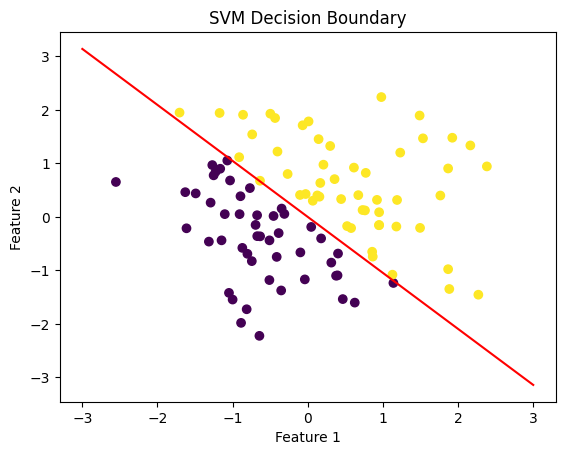

In [ ]:
import numpy as np

def svm_train(X, y, learning_rate=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    for _ in range(epochs):
        for i, x in enumerate(X):
            if y[i] * np.dot(x, w) < 1:
                w = w + learning_rate * (y[i] * x - 2 * (1/epochs) * w)
    return w

def svm_predict(X, w):
    return np.sign(np.dot(X, w))

# Generate toy dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Split data into train and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Train SVM
w = svm_train(X_train, y_train)

# Make predictions
y_pred = svm_predict(X_test, w)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize decision boundary
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
xx = np.linspace(-3, 3)
yy = -w[0]/w[1] * xx - (0)/w[1]
plt.plot(xx, yy, 'r-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

## Decision Tree

Apart from **k-nearest neighnours**, the **decision tree** (Friedman 1994) is another type of learning algorithm that also breaks the input space into regions and has separate paramters for each region. Space is subdivided into non-overlapping regions

Cons:
- cant solve the two-class problem, where the positive class occurs whenever a sample $x_2 > x_1$. The decision treee will thus need to approximate the decision boundary with many notes, implementing a step function that consistently walks back and forth across the true decision function.

In [ ]:
from graphviz import Digraph

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def play_tennis_decision_tree():
    # Create the decision tree structure
    root = Node(feature="Outlook")

    # Rainy branch
    root.left = Node(feature="Windy")
    root.left.left = Node(value="Don't Play")  # Rainy and Windy
    root.left.right = Node(value="Play")       # Rainy and Not Windy

    # Overcast branch
    root.threshold = Node(value="Play")        # Overcast

    # Sunny branch
    root.right = Node(feature="Humidity")
    root.right.left = Node(value="Don't Play")  # Sunny and High Humidity
    root.right.right = Node(value="Play")       # Sunny and Normal Humidity

    return root

def predict(node, sample):
    if node.value is not None:
        return node.value

    if node.feature == "Outlook":
        if sample[node.feature] == "Overcast":
            return predict(node.threshold, sample)
        elif sample[node.feature] == "Rainy":
            return predict(node.left, sample)
        else:  # Sunny
            return predict(node.right, sample)
    else:
        if sample[node.feature] == "Yes" or sample[node.feature] == "High":
            return predict(node.left, sample)
        else:
            return predict(node.right, sample)

def visualize_tree(node, dot=None, parent_node_id=None, edge_label=None):
    if dot is None:
        dot = Digraph()
        dot.attr(rankdir='TB', size='8,5')
        dot.attr('node', shape='rectangle')

    node_id = str(id(node))

    if node.value is not None:
        dot.node(node_id, node.value, style='filled', fillcolor='lightblue')
    else:
        dot.node(node_id, node.feature, style='filled', fillcolor='lightgreen')

    if parent_node_id:
        dot.edge(parent_node_id, node_id, label=edge_label)

    if node.left:
        visualize_tree(node.left, dot, node_id, "Yes/High/Rainy")
    if node.right:
        visualize_tree(node.right, dot, node_id, "No/Normal/Sunny")
    if node.threshold:
        visualize_tree(node.threshold, dot, node_id, "Overcast")

    return dot

# Create the decision tree
tree = play_tennis_decision_tree()

# Visualize the tree
dot = visualize_tree(tree)
dot.render("tennis_decision_tree", format="png", cleanup=True)
print("Decision tree visualization saved as 'tennis_decision_tree.png'")

# Test the decision tree
samples = [
    {"Outlook": "Rainy", "Windy": "Yes"},
    {"Outlook": "Rainy", "Windy": "No"},
    {"Outlook": "Overcast"},
    {"Outlook": "Sunny", "Humidity": "High"},
    {"Outlook": "Sunny", "Humidity": "Normal"}
]

for sample in samples:
    decision = predict(tree, sample)
    print(f"Conditions: {sample}")
    print(f"Decision: {decision}\n")

Decision tree visualization saved as 'tennis_decision_tree.png'
Conditions: {'Outlook': 'Rainy', 'Windy': 'Yes'}
Decision: Don't Play

Conditions: {'Outlook': 'Rainy', 'Windy': 'No'}
Decision: Play

Conditions: {'Outlook': 'Overcast'}
Decision: Play

Conditions: {'Outlook': 'Sunny', 'Humidity': 'High'}
Decision: Don't Play

Conditions: {'Outlook': 'Sunny', 'Humidity': 'Normal'}
Decision: Play



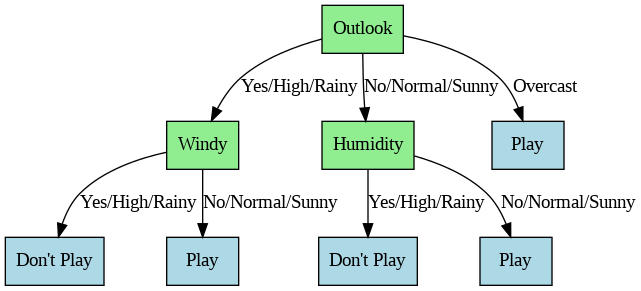

In [ ]:
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < 2:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)

        # Split the data
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        # Grow the children
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _best_split(self, X, y):
        m = X.shape[1]
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(m):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gini = self._gini_impurity(y, X[:, feature_index], threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, y, feature, threshold):
        left_indices = feature < threshold
        right_indices = ~left_indices

        left_gini = self._calculate_gini(y[left_indices])
        right_gini = self._calculate_gini(y[right_indices])

        n = len(y)
        n_left = np.sum(left_indices)
        n_right = n - n_left

        weighted_gini = (n_left / n) * left_gini + (n_right / n) * right_gini
        return weighted_gini

    def _calculate_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)


# Generate a simple dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 0, 0, 1, 1, 1])

# Create and train the decision tree
dt = DecisionTree(max_depth=3)
dt.fit(X, y)

predictions = dt.predict(X)

# Evaluate accuracy on the training set
correct_cnt = 0
for i in range(len(y)):
    if y[i] == predictions[i]:
        correct_cnt += 1
print(f"Accuracy: {correct_cnt / len(y)}")


# Make predictions
X_test = np.array([[3.5, 4.5], [6.5, 7.5]])
predictions = dt.predict(X_test)
print("Predictions:", predictions)

Accuracy: 1.0
Predictions: [0 1]


# Unsupervised Learning Algorithms

**Unsupervsied learning** algorithms are thoose that experience only "features" but not a supvervision signal. The distinction between supervised and umsupervised algorithms is not formally and rigitly definred, becuase there is no objective test for distinguishing whether a aluvae is a featre or a target provided by a supervisor. Infromally, unsupervised learning refers to most attempts to extract information from a distribution that do not require humna labor to annotate examples. THer term is usually associcated with density etimatioj, learning to draw samples from a distribution, learning to denoise data from some distribution, finding a manifold that the data lies near, or clustering the data into groups of related samples.

A classic unsupervised learning task is to find the "best" representation od the data. By "best" we can mean different things, but generally speaking we are looking for a representation that preserves as much information about $x$ as possible while obeying some penalty or constraint aimed at keeping the representation _simpler_ or more accessible that $x$ itself.

## Principal Component Analysis

We can view **PCA** as a unsupervised learning algorithm that learns a representation of data. PCA learns a representation that has lower dimensionality than the original input. It also learns a representation whose elements have no linear correlation with eachother.

THis is the first step toward the critirion of learning representations whose elements are statistically independent, To achive full independence a representation learning algorithm must also remove nonlinear relationships between variables.

PCA learns an orthogoonal, linear transformation of the data that projects an input $x$ to a representation $z$.

Remember: A vector $x$ and a vector $y$ are **orthongal** to each other if $x^Ty = 0$. IF both vectors have nonzeronrom, this means they are at 90 degree angle to eachother.

The unbiased sample covariance matrix with X is given by

$$
  Var[x] = \frac{1}{m-1} X^TX
$$

PCA finds a presentation (through linear transformation) $z = W^Tx$, when $Var[z]$ is diagonal.

The princiapl commponents may also be opbstained via singular value decompoistion (SVD). Specifically, there are the right singular vectors of $X$. To see this, let $W$ be the right singular vectors in the decomposition of $X = U\Sigma W^T$. We then recover the original eigenvevtor equation with $W$ as the eigenvector basis:

$$
  X^T X = (W\Sigma W^T)T U\Sigma W^T = W\Sigma^2W^T
$$

The SVD is helpful to show that PCA results in a diagonal $Var[x]$. Using the SVD of $X$, we can express the variance of $X$ as:

$$
  Var[x] = \frac{1}{m-1} X^TX \\
  = \frac{1}{m-1} (U\Sigma W^T)^T U\Sigma W^T \\
  = \frac{1}{m-1} W \Sigma^TU^TU\Sigma W^T \\
  = \frac{1}{m-1} W \Sigma^2 W^T
$$

Taking advantate of $U^TU=I$ because the $U$ matrix of the singular value decomposition is defined to be orthogonal. This shows us that the covariance of $z$ is diagonal as required:

$$
  Var[z] = \frac{1}{m-1} Z^TZ \\
  = \frac{1}{m-1} W^TX^TXW \\
  = \frac{1}{m-1} W^TW \Sigma^2 W^T W \\
  = \frac{1}{m-1} \Sigma^2
$$

Where this time we use the fact that $W^TW = I$, again from the definition of SVD.
The above analysis shows that the resulting representation has a diagonal covariance matri, which immediately implies that the individual elements of $z$ are mutually uncorrelated.

PCA finds a rotaation of the input space (described by $W$) that aligns the prinicipal axes of variance with the basis of the new representation space associated with $z$.

In [ ]:

import numpy as np

def pca(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    return X_centered @ eigenvectors[:, :n_components]

# Example usage
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
X_pca = pca(X, n_components=2)
print(f"PCA result:\n {X_pca}")

import numpy as np

def pca_svd(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return X_centered @ Vt.T[:, :n_components]

# Example usage
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
X_pca = pca_svd(X, n_components=2)
print(f"PCA result:\n {X_pca}")

PCA result:
 [[-7.79422863e+00 -3.33066907e-16]
 [-2.59807621e+00 -1.11022302e-16]
 [ 2.59807621e+00  1.11022302e-16]
 [ 7.79422863e+00  3.33066907e-16]]
PCA result:
 [[-7.79422863e+00 -1.66533454e-15]
 [-2.59807621e+00 -5.55111512e-16]
 [ 2.59807621e+00  5.55111512e-16]
 [ 7.79422863e+00  1.66533454e-15]]


## k-means clustering

The k-means clustering algorithm divides the training set into $k$ different clusters of examples that are near each other. We can think of the algorithm as provding a $k$-dimensional one-hot code vector $h$ representing an input $x$. If $x$ belongs to cluster $i$, then $h_i=1$, all other entries of the representation $h$ are zero. The one-hot code provided by k-mean clustering is an example of a spare representation, because the majority of its entires are zero for every input.

The k-means algorithm works by intitializing $k$ differnt centroids to different values, the alternating between two different steps until convergence. In one step, each training example is assigned to a cluster $i$, where $i$ is the index of the nearest centroid. In the other step, each entroid is updated to the mean of all training examples $x^{(j)}$ assigned to cluster $i$.

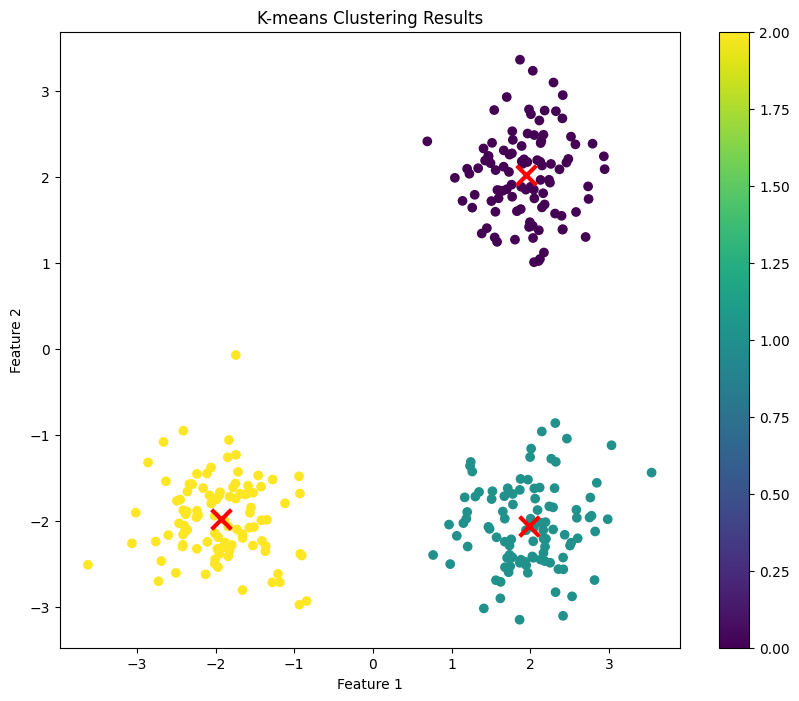

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = distances.argmin(axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Generate sample data
np.random.seed(42)
X = np.random.randn(300, 2) * 0.5
X[:100] += np.array([2, 2])
X[100:200] += np.array([-2, -2])
X[200:] += np.array([2, -2])

# Perform k-means clustering
k = 3
labels, centroids = kmeans(X, k)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.colorbar(scatter)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Stochastic Gradient Descent

The expectation may be approximately estimates using a small set of samples. Speficcally, on each step of the algorithm, we can sample a **minibatch** of examples drawn uniformly from the training set.

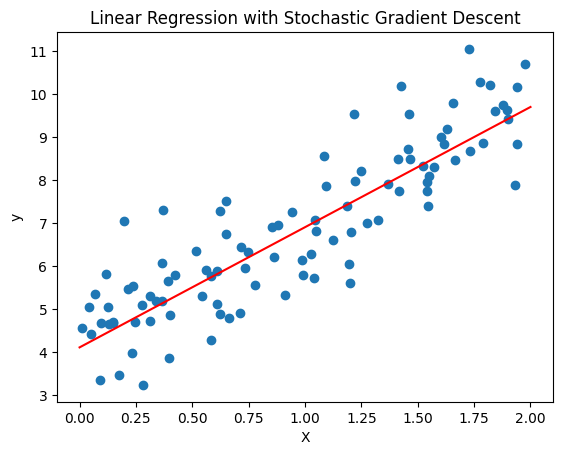

Estimated coefficients (intercept, slope): [4.11019589 2.7926811 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_sgd(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index]
            prediction = np.dot(xi, theta)

            # Update theta using the gradients
            theta = theta - learning_rate * (prediction - yi) * xi.flatten()

    return theta

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Train the model
theta = linear_regression_sgd(X_b, y)

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

# Plot the results
plt.scatter(X, y)
plt.plot(X_new, y_predict, 'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Stochastic Gradient Descent')
plt.show()

print(f"Estimated coefficients (intercept, slope): {theta}")

# Building a Machine Learning Algorithm

A simple recipe:
1. specification of a datasset,
2. a cost function,
3. an optimization prodecdure, and
4. a model.

Fro example a linear regression algorith combines a dataset consisting of $X$ and $y$, the cost function

$$
  J(w,b) = - \mathbb{E}_{x,y\sim \hat{p}_{data}} \log p_{model} (y|x)
$$

The model specification $ p_{model} (y|x) = \mathcal{N}(y;x^Tw + b,1)$, and in most cases, the optimization algorithm defined by solving for where the gradient of the cost is zero using the normal equations.

The cost function typically indcludes at least one term that causes the learning process to perform statistical estimation. The most cmoon cost function is the negative log-likelihood, so that mimimizing the cost function causes maximum likelihood estimation.

The cost function may include additional terms, such as regularization terms. Fro example, we can add weight decay to the linear regression cost function to obtain

$$
  J(w,b) = \lambda ||w||^2_2 - \mathbb{E}_{x,y\sim \hat{p}_{data}} \log p_{model} (y|x)
$$


For example, we can obstain the first principal component, the first vector of a PCA, by specifying that our loss function is

$$
  J(w) = \mathbb{E}_{x\sim data} || x - r(x;w)||^2_2
$$

while our model is defined to have $w$ with norm one and reconstruction function $r(x) = w^Txw$

Or in code.

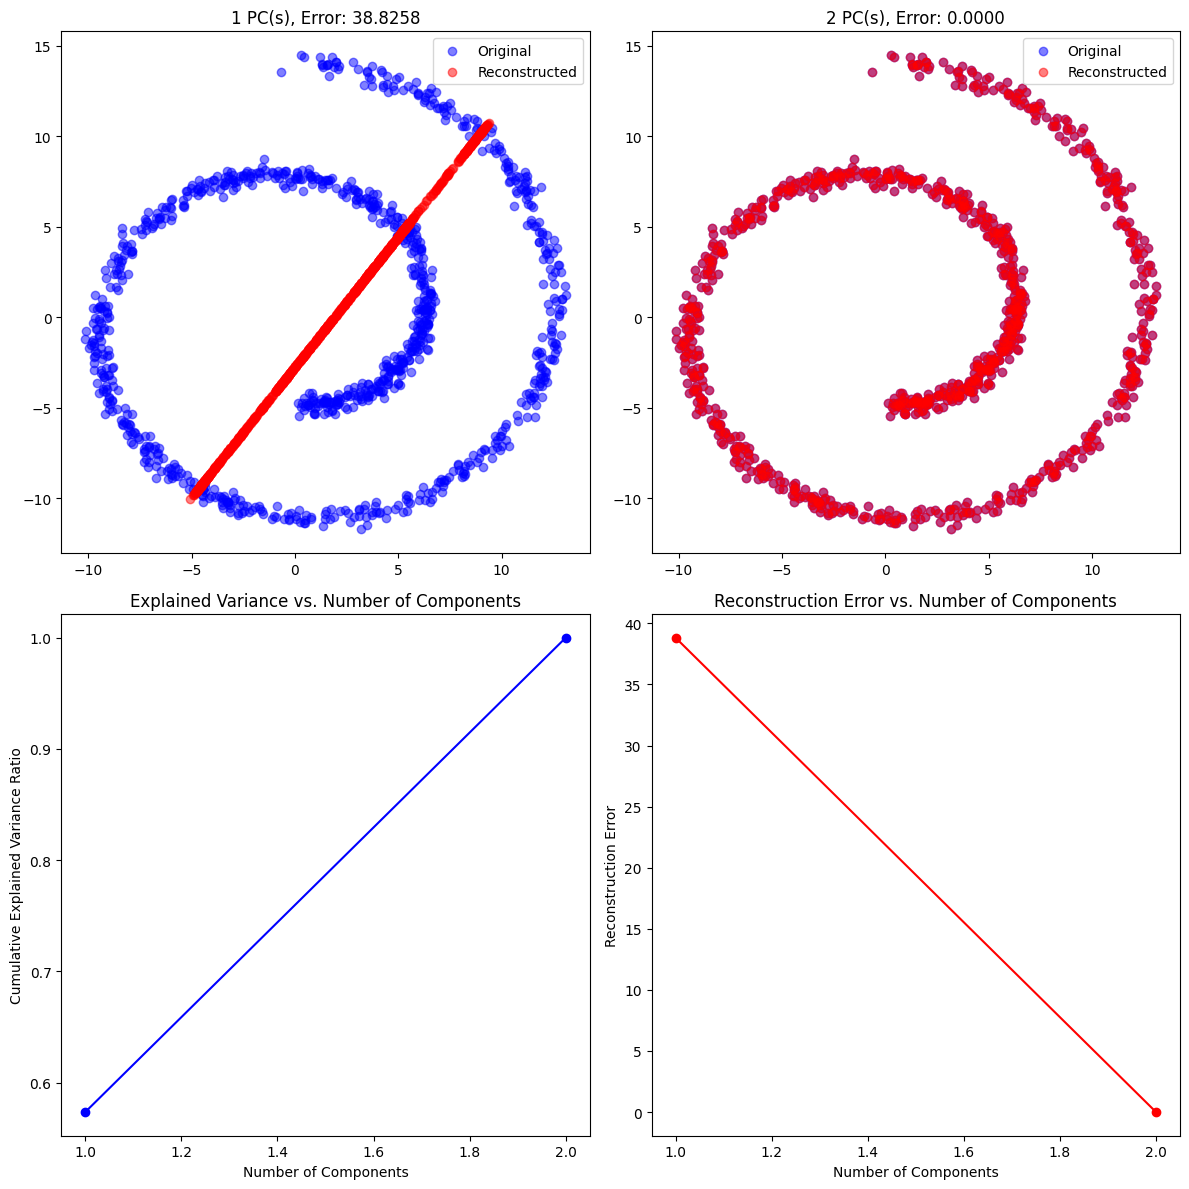

First Principal Component (w):
[0.57051826 0.82128492]

Norm of the first principal component: 0.9999999999999998


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

# Generate Swiss Roll dataset
n_samples = 1000
X, _ = make_swiss_roll(n_samples=n_samples, noise=0.3, random_state=42)
X = X[:, [0, 2]]  # Use only two dimensions for visualization

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

def reconstruct_pca(X_pca, pca, n_components):
    """Reconstruct data using the first n_components"""
    return np.dot(X_pca[:, :n_components], pca.components_[:n_components, :]) + pca.mean_

def calculate_reconstruction_error(X, X_reconstructed):
    """Calculate the mean squared reconstruction error"""
    return np.mean(np.sum((X - X_reconstructed) ** 2, axis=1))

# Plot original data and reconstructions
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

reconstructions = [1, 2]
for i, n_components in enumerate(reconstructions):
    X_reconstructed = reconstruct_pca(X_pca, pca, n_components)
    error = calculate_reconstruction_error(X, X_reconstructed)

    axs[i].scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5, label='Original')
    axs[i].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='red', alpha=0.5, label='Reconstructed')
    axs[i].set_title(f'{n_components} PC(s), Error: {error:.4f}')
    axs[i].legend()

# Plot cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
axs[2].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
axs[2].set_xlabel('Number of Components')
axs[2].set_ylabel('Cumulative Explained Variance Ratio')
axs[2].set_title('Explained Variance vs. Number of Components')

# Plot reconstruction error vs number of components
errors = [calculate_reconstruction_error(X, reconstruct_pca(X_pca, pca, i)) for i in range(1, X.shape[1] + 1)]
axs[3].plot(range(1, len(errors) + 1), errors, 'ro-')
axs[3].set_xlabel('Number of Components')
axs[3].set_ylabel('Reconstruction Error')
axs[3].set_title('Reconstruction Error vs. Number of Components')

plt.tight_layout()
plt.show()

# Print the first principal component
print("First Principal Component (w):")
print(pca.components_[0])
print("\nNorm of the first principal component:", np.linalg.norm(pca.components_[0]))

# The curse of dimensionality

Many machine learning problems become exceedingly difficult when the number of dimensions in the data is hight. This phenomenon is known as the **curse of dimensionality** (Köppen 2000). Of particulary concer is that the number of possible distinct configurations of a set of variables icnreases expontentially as the number of variables increases.

# Local Constancey and Smoothness Regularization

The **smoothness prior** or **local constancy prior** states that the function we learn should not change very much within a small region. All these different methods are designed to encourage the learning process to learn a function $f^*$ that statisfies the condition

$$
  f^*(x) \approx f^*(x + \epsilon)
$$

for most configurations of $x$ and a small change $\epsilon$.

If a target funcction requires a decision tree with at least $n$ leaves to be represented accurately, then at least $n$ training examples are required to fir the tree. A multiple of $n$ is needed to achive some level of statistical confidence in the predicted output.

# Manifold Learning

A **manifold** is a connected region. Mathematically, it is a set of points associated with a neighbourhood around each point. From any given point the manifold locally apppears to be a Euclidean space.

The **manifold hypothesis** is that:
1. the probability distribution over images, text strings, and sounds that occur in real life is highly concentrated. Uniform noise essentially never resemble structure inputs from these domains.
2. Examples that we encounter are connected to each other by other examples, which each example surrounded by other highly similar examples that can be reached by applyign transformations to traverse the manifold. The second argument in favor of the manifold hypothesis is that we can imagine such neighbourhoods and transformations, at least informally.

More rigiourous expermiments (Cayton 2005) clearly support the the hypothesis for a large class of datasets of interest in AI.

See the ISOMAP (Balasubramanian 2002) proposed for manifold learning on the swiss roll dataset.



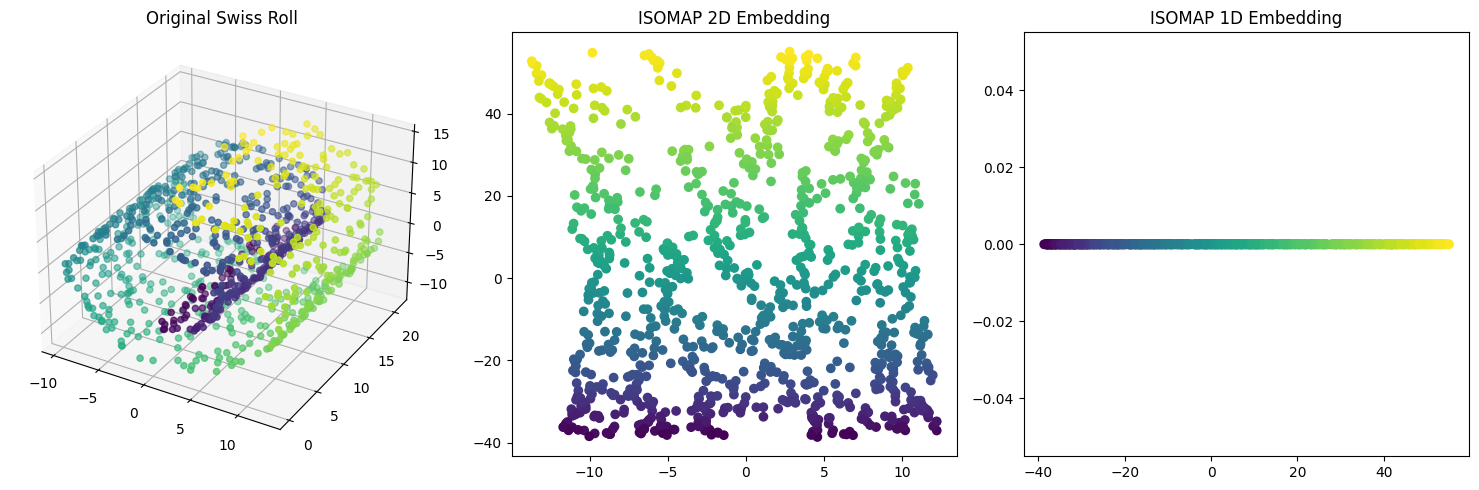

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import NearestNeighbors

def isomap(X, n_neighbors=5, n_components=2):
    # Step 1: Construct the neighborhood graph
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Step 2: Compute the shortest path distances
    n_samples = X.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    dist_matrix.fill(np.inf)

    for i in range(n_samples):
        dist_matrix[i, indices[i]] = distances[i]

    for k in range(n_samples):
        dist_matrix = np.minimum(dist_matrix,
                                 dist_matrix[k, :, np.newaxis] + dist_matrix[np.newaxis, k, :])

    # Step 3: Perform Multidimensional Scaling (MDS)
    H = np.eye(n_samples) - np.ones((n_samples, n_samples)) / n_samples
    B = -0.5 * H.dot(dist_matrix ** 2).dot(H)
    eigvals, eigvecs = np.linalg.eigh(B)

    return eigvecs[:, -n_components:] * np.sqrt(eigvals[-n_components:])

# Generate Swiss Roll dataset
n_samples = 1000
X, color = make_swiss_roll(n_samples=n_samples, noise=0.1, random_state=42)

# Apply ISOMAP
X_iso = isomap(X, n_neighbors=10, n_components=2)

# Visualize the results
fig = plt.figure(figsize=(15, 5))

# Original Swiss Roll
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax1.set_title('Original Swiss Roll')

# ISOMAP 2D embedding
ax2 = fig.add_subplot(132)
ax2.scatter(X_iso[:, 0], X_iso[:, 1], c=color, cmap=plt.cm.viridis)
ax2.set_title('ISOMAP 2D Embedding')

# ISOMAP 1D embedding (for comparison)
X_iso_1d = isomap(X, n_neighbors=10, n_components=1)
ax3 = fig.add_subplot(133)
ax3.scatter(X_iso_1d, np.zeros_like(X_iso_1d), c=color, cmap=plt.cm.viridis)
ax3.set_title('ISOMAP 1D Embedding')

plt.tight_layout()
plt.show()